<a href="https://colab.research.google.com/github/VanNguyenThiCam/Code-Math/blob/main/StatisticAndAplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEAN

# Lập trình Python tìm giá trị Mean


***Chuẩn bị dữ liệu hình ảnh***

In [7]:
import numpy as np
import cv2

In [8]:
from google.colab import drive #cách lấy dữ liệu trên google.colab 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
from google.colab.patches import cv2_imshow

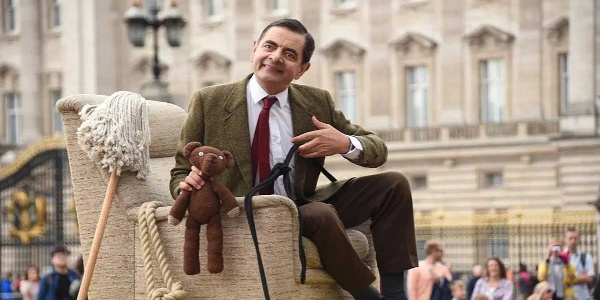

In [10]:
image1 = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbeanl.jpg')
cv2_imshow(image1)

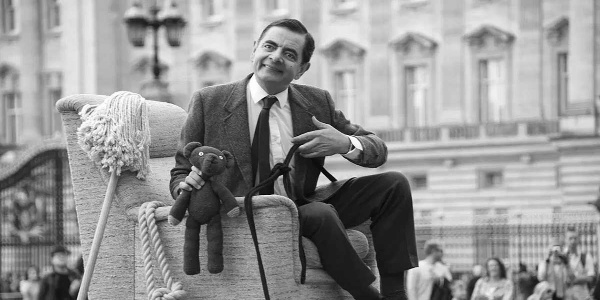

In [11]:
#load ảnh xám lên nên có số 0
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbeanl.jpg',0)

cv2_imshow(image)

In [12]:
#Tạo kernel
kernel = np.ones((5,5), np.float32) /25.0

In [13]:
#Tính mean cho mỗi pixel
dst = cv2.filter2D(image, cv2.CV_8U, kernel)

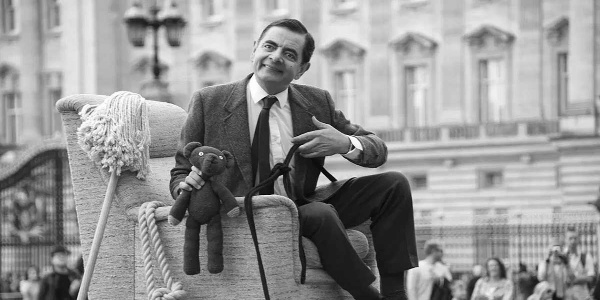

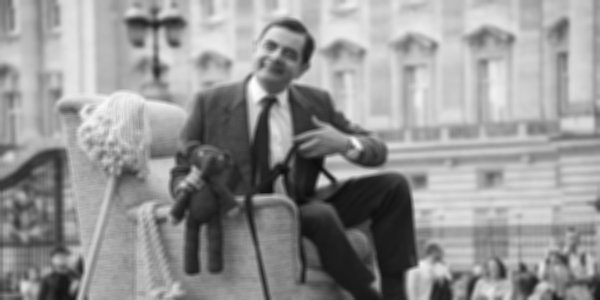

In [14]:
cv2_imshow(image)
cv2_imshow(dst)

***Câu hỏi đặt ra là không muốn làm mờ toàn ảnh mà chỉ làm mờ khuôn mặt người***

# Ứng dụng sử dụng Mean

In [23]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [37]:
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbean.jpg',0)

In [38]:
kernel = np.ones((5,5), np.float32) / 25.0

In [39]:
#Cho trước giá trị y gốc trên, x gốc trên, chiều cao, chiều rộng

roi = image[40:140,150:280]

In [40]:
roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
image[40:140,150:280] = roi

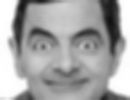

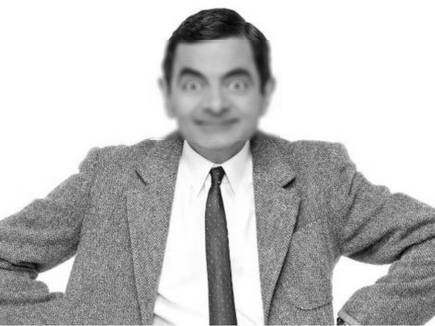

In [41]:
cv2_imshow(roi)
cv2_imshow(image)

#Muốn mờ thì mình mean nhiều lần

In [21]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/haarcascade_frontalface_default.xml')

In [43]:
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbean.jpg',1)

#image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbean.jpg')

#Cả hai cách đều đọc ra ảnh màu


In [32]:
image1 = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/Statistics/mrbean.jpg',0)

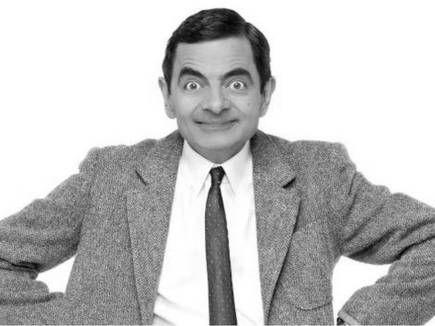

In [33]:
cv2_imshow(image1)

In [44]:
#CÁCH 2 CHUYỂN VỀ ẢNH XÁM
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [45]:
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

In [ ]:
for (x, y, w, h) in faces:
